In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Create a dataset with 10 rows
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 63],
    'Income': [20, 22, 50, 60, 55, 80, 85, 90, 95, 100],
    'Purchased': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1] # 0=No, 1=Yes
}
df = pd.DataFrame(data)
print(df)

   Age  Income  Purchased
0   22      20          0
1   25      22          0
2   47      50          1
3   52      60          1
4   46      55          1
5   56      80          1
6   55      85          1
7   60      90          1
8   62      95          1
9   63     100          1


In [2]:
# Model Building
X = df[['Age', 'Income']]
y = df['Purchased']

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

print("Predictions:", y_pred)

Predictions: [0 0 1 1 1 1 1 1 1 1]


In [3]:
# Evaluation
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[2 0]
 [0 8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         8

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



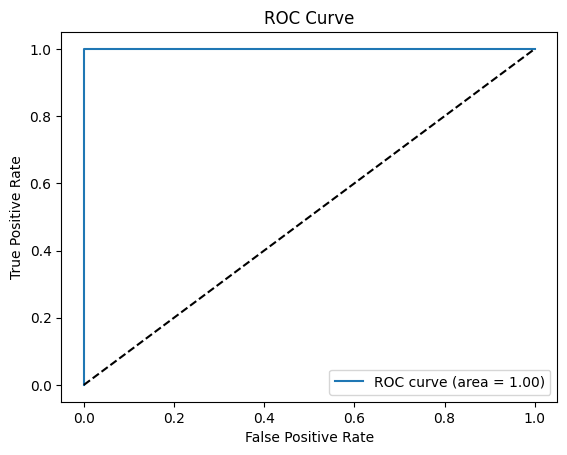

In [4]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()